In [1]:
%%capture
from functions import *

@register_cell_magic
def markdown(line, cell):
    return md(cell.format(**globals()))

# Student Info

---

The student info dataframe contains information about students including the module and presentation they took, demographic information and the final result of their studies.

In [2]:
# looking at the student_info dataframe
student_info.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass


## Contents

* **code_module**: The code module represents the course the student is taking.
* **code_presentation**: The code presentations are the year and semester the student is taking the course.
* **id_student**: The student ID is a unique identifier for each student
* **gender**: The gender represents the binary gender of a student 'M' for students who identify as male and 'F' for students who identify as female.
* **region**: Region represents the location of the student when they took the module. All regions are in the UK, Scotland, Ireland or Wales.
* **highest_education**: Highest education is representative of a students highest level of formal academic achievement.
    - Education levels in order from least to most formal education: 
        - No formal quals (qualifications)
        - Lower than A Level which is nearly but not quite analagous to under high school level
        - A Level or equivalent which is again nearly analagous to high school level, but more like college ready
        - HE Qualification which stands for higher education qualification
        - Post Graduate Qualification
* **imd_band**: The imd_band represents the Indices of multiple deprivation (IMD) score which is a commonly used method in the UK to measure poverty or deprivation in an area. The lower the score, the more 'deprived' the area is.
* **age_band**: There are only three bins for age; 0-35, 35-55 and over 55
* **num_of_prev_attempts**: The number of times the student has attempted the course previously.
* **studied_credits**: The number of credits for the module the student is taking.
* **disability**: Disability status is represented by a binary 'Y', yes a student does identify as having a disability and 'N', no a student does not identify as having a disability.
* **final_results**: * The final result is the students overall result in the class.
    - Possible Results include:
         - Pass: The student passed the course
         - Fail: The student did not pass the course
         - Withdraw: The student withdrew before the course term ended
         - Distinction: The student passed the class with distinction

---

## Student Info Information

In [3]:
md(f'''

**Size**
    
* Number of Rows: {len(student_info)}
* Number of Columns: {len(student_info.columns)}

**Data Types**
''')



**Size**
    
* Number of Rows: 32593
* Number of Columns: 12

**Data Types**


In [4]:
# show student info data types
student_info.dtypes

code_module             object
code_presentation       object
id_student               int64
gender                  object
region                  object
highest_education       object
imd_band                object
age_band                object
num_of_prev_attempts     int64
studied_credits          int64
disability              object
final_result            object
dtype: object

* id_student is currently an int64 datatype, but would be more appropriate as an object data type since it is categorical.

In [5]:
# changing id_student to the object data type
student_info['id_student'] = student_info['id_student'].astype(object)

**Null Values:**

In [6]:
student_info.isnull().sum()

code_module                0
code_presentation          0
id_student                 0
gender                     0
region                     0
highest_education          0
imd_band                1111
age_band                   0
num_of_prev_attempts       0
studied_credits            0
disability                 0
final_result               0
dtype: int64

In [7]:
imd_null = student_info['imd_band'].isnull().sum()

In [8]:
%%markdown

* The imd_band variable has {imd_null} null values which we may have to work around. 


* The imd_band variable has 1111 null values which we may have to work around. 


**Unique Counts:**

In [9]:
student_info.nunique()

code_module                 7
code_presentation           4
id_student              28785
gender                      2
region                     13
highest_education           5
imd_band                   10
age_band                    3
num_of_prev_attempts        7
studied_credits            61
disability                  2
final_result                4
dtype: int64

In [10]:
total_students = student_info['id_student'].count()
unique_students = student_info['id_student'].nunique()

In [11]:
%%markdown

* There are {total_students} entries for students but only {unique_students} unique student IDs.
* This may represent students who have taken the course more than once or who are taking multiple modules


* There are 32593 entries for students but only 28785 unique student IDs.
* This may represent students who have taken the course more than once or who are taking multiple modules


**Unique Categorical Values**

In [12]:
unique_vals(student_info)

code_module: ['AAA' 'BBB' 'CCC' 'DDD' 'EEE' 'FFF' 'GGG']

code_presentation: ['2013J' '2014J' '2013B' '2014B']

id_student: [11391 28400 30268 ... 2648187 2679821 2684003]

gender: ['M' 'F']

region: ['East Anglian Region' 'Scotland' 'North Western Region'
 'South East Region' 'West Midlands Region' 'Wales' 'North Region'
 'South Region' 'Ireland' 'South West Region' 'East Midlands Region'
 'Yorkshire Region' 'London Region']

highest_education: ['HE Qualification' 'A Level or Equivalent' 'Lower Than A Level'
 'Post Graduate Qualification' 'No Formal quals']

imd_band: ['90-100%' '20-30%' '30-40%' '50-60%' '80-90%' '70-80%' nan '60-70%'
 '40-50%' '10-20' '0-10%']

age_band: ['55<=' '35-55' '0-35']

disability: ['N' 'Y']

final_result: ['Pass' 'Withdrawn' 'Fail' 'Distinction']



In imd_band the % sign is missing in 10-20. We will add that for consistency and clarity

In [13]:
# changing all 10-20 values in student_info imd_band to 10-20% for consistency's sake
student_info.loc[student_info['imd_band'] == '10-20', 'imd_band'] = '10-20%'
print(student_info['imd_band'].explode().unique())

['90-100%' '20-30%' '30-40%' '50-60%' '80-90%' '70-80%' nan '60-70%'
 '40-50%' '10-20%' '0-10%']


**Duplicate Values**

In [14]:
analyze_df(student_info, dupes=True)

'No Duplicate Values'

**Statistics:**

In [15]:
student_info.describe().astype(int)

,num_of_prev_attempts,studied_credits
count,32593,32593
mean,0,79
std,0,41
min,0,30
25%,0,60
50%,0,60
75%,0,120
max,6,655


In [16]:
max_attempts = student_info['num_of_prev_attempts'].max()

In [17]:
%%markdown

* Most students do not have a previous attempt, but there is a high of {max_attempts} attempts.
* We can only have data for up to two of the students attempts since we only have two years worth of data.


* Most students do not have a previous attempt, but there is a high of 6 attempts.
* We can only have data for up to two of the students attempts since we only have two years worth of data.


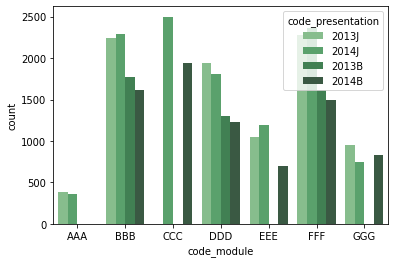

In [18]:
ax = sns.countplot(x="code_module", hue="code_presentation", palette="Greens_d", data=student_info)

In [19]:
students_per_presentation_module = pd.DataFrame(student_info['id_student'].groupby([student_info['code_module'], student_info['code_presentation']]).count()).reset_index()
students_per_presentation_module = students_per_presentation_module.sort_values(by=['code_presentation', 'code_module']).reset_index(drop=True)
students_per_presentation_module['year'] =students_per_presentation_module['code_presentation'].str[:4]
students_per_presentation_module['month'] =students_per_presentation_module['code_presentation'].str[4:]

In [20]:
students_per_presentation_module

,code_module,code_presentation,id_student,year,month
0,BBB,2013B,1767,2013,B
1,DDD,2013B,1303,2013,B
2,FFF,2013B,1614,2013,B
3,AAA,2013J,383,2013,J
4,BBB,2013J,2237,2013,J
5,DDD,2013J,1938,2013,J
6,EEE,2013J,1052,2013,J
7,FFF,2013J,2283,2013,J
8,GGG,2013J,952,2013,J
9,BBB,2014B,1613,2014,B
